#### styles

In [2]:
%%html
<style>

    h1{
        font-weight: 700 !important;
    }
    .jp-MarkdownOutput h1,.jp-MarkdownOutput h2,.jp-MarkdownOutput h3,.jp-MarkdownOutput h4,.jp-MarkdownOutput h5,.jp-MarkdownOutput h6 {
        font-weight: 800 !important;
        color: #2563eb;
        width: max-content;
        border-bottom: 4px solid #38bdf8;
    }
</style>

# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

ValueError: could not convert string to float: 'Yes'

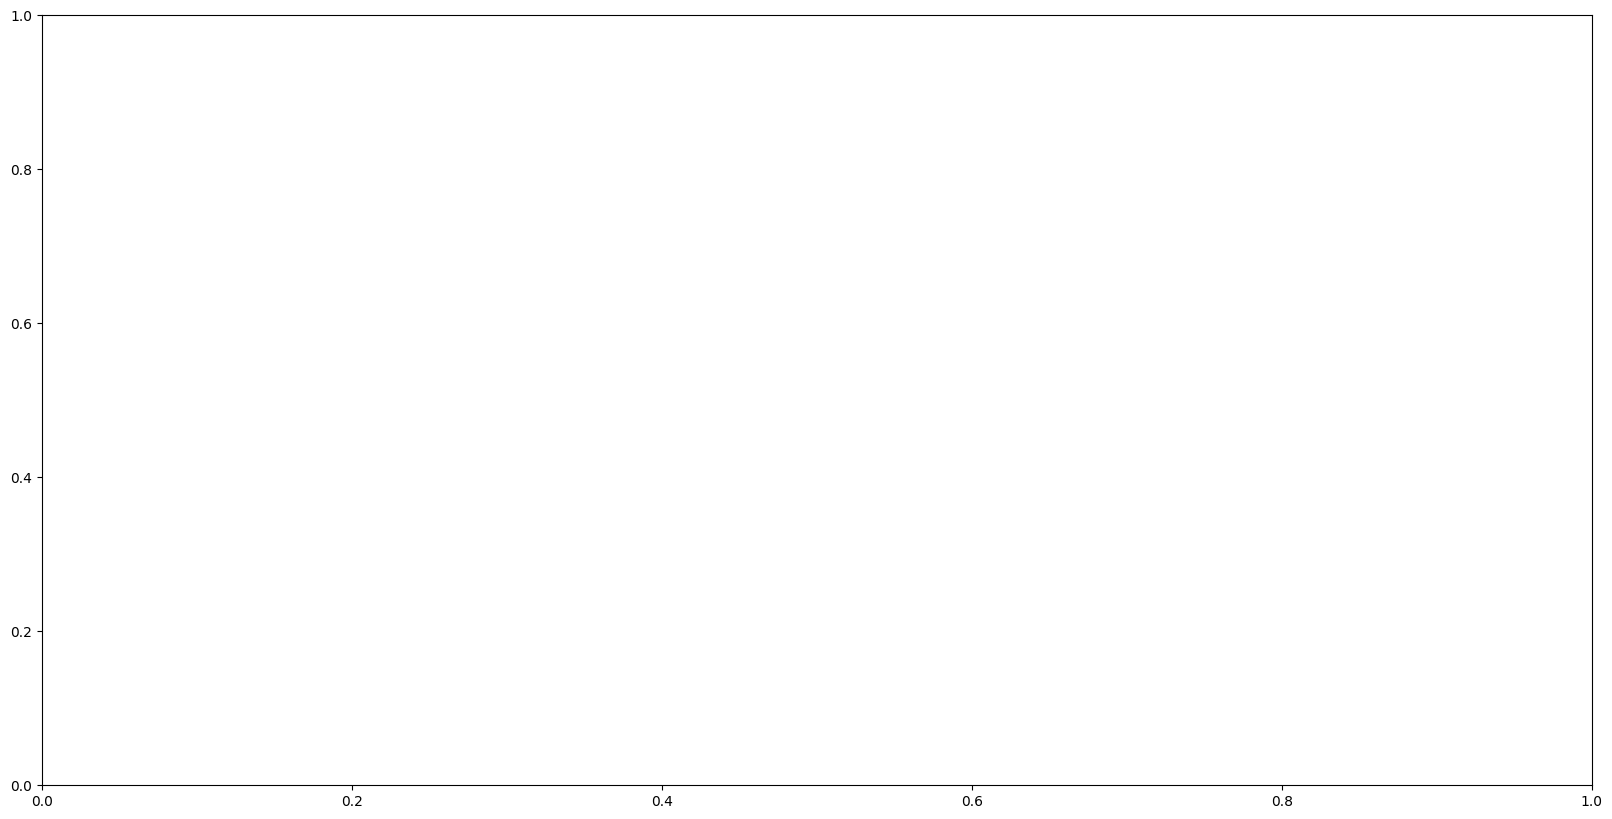

In [6]:
label
fig, ax = plt.subplots(figsize=(20, 10))
new_df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)
sns.heatmap(new_df.corr(), ax=ax, annot=True, cmap='GnBu')

In [ ]:
df.shape

In [ ]:
df.describe(include='object')

`Most of the values in attrition column are No` <br>
`All the employees are Over 18`

In [ ]:
df.isna().sum().sum() # Null Values

In [ ]:
df.duplicated().sum() 

In [ ]:
df['Age'].mean()
df['Age'].plot.hist(edgecolor='black', color='#60a5fa')

`More employees are between age 30-40`

`Average Age is round 37`

<AxesSubplot: ylabel='Attrition'>

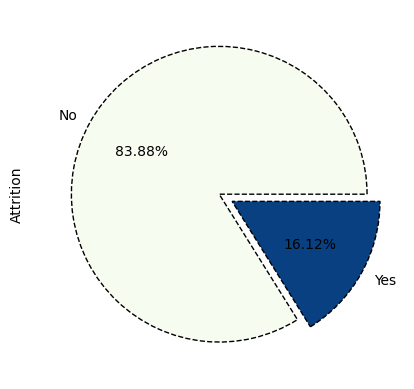

In [11]:
df['Attrition'].value_counts().plot.pie(explode=[0, 0.1], wedgeprops={'edgecolor': 'black', 'linestyle':'dashed'}, autopct="%1.2f%%", cmap='GnBu')

`Data is imbalanced`

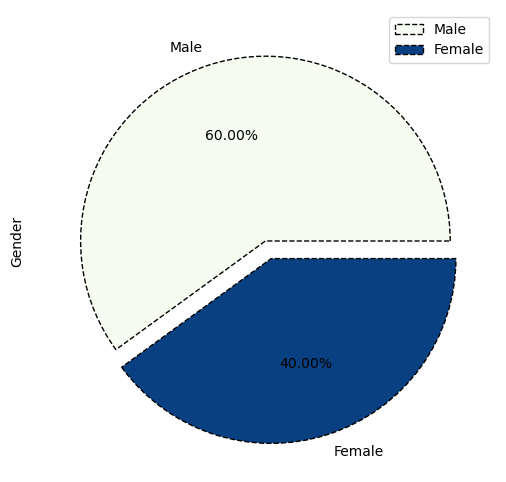

In [12]:
df['Gender'].value_counts().plot.pie(explode=[0, 0.1], wedgeprops={'edgecolor': 'black', 'linestyle':'dashed'}, figsize=(16, 6), autopct="%1.2f%%", cmap='GnBu')
plt.legend()
plt.show()

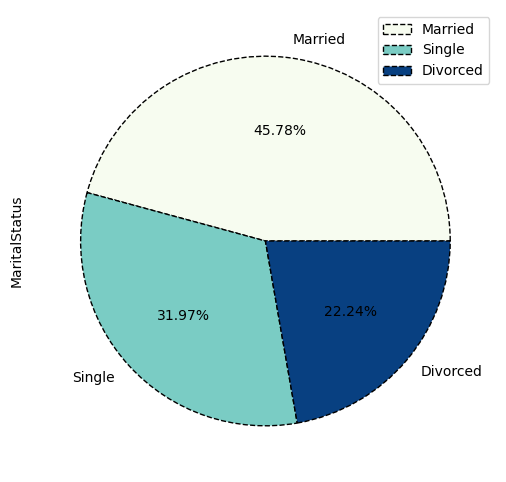

In [13]:
df['MaritalStatus'].value_counts().plot.pie(wedgeprops={'edgecolor': 'black', 'linestyle':'dashed'}, figsize=(16, 6), autopct="%1.2f%%", cmap='GnBu')
plt.legend()
plt.show()

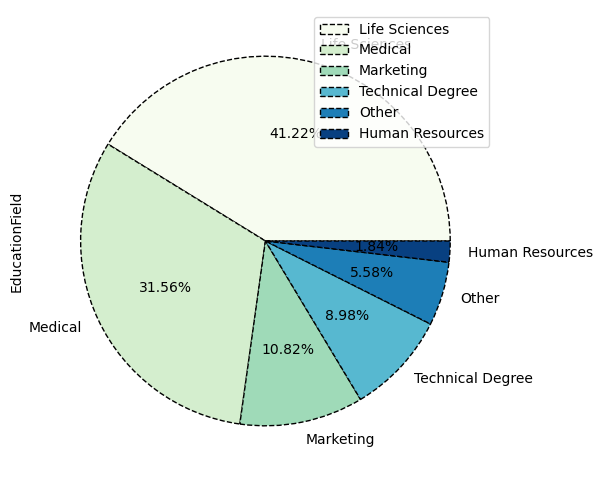

In [14]:
df['EducationField'].value_counts().plot.pie(wedgeprops={'edgecolor': 'black', 'linestyle':'dashed'}, figsize=(16, 6), autopct="%1.2f%%", cmap='GnBu')
plt.legend()
plt.show()

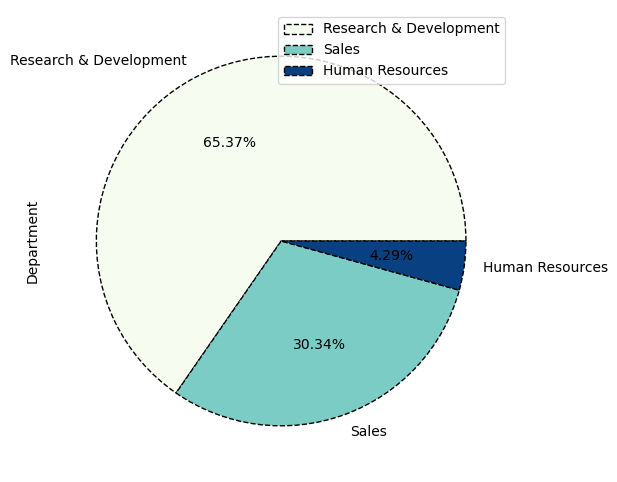

In [15]:
df['Department'].value_counts().plot.pie(wedgeprops={'edgecolor': 'black', 'linestyle':'dashed'}, figsize=(16, 6), autopct="%1.2f%%", cmap='GnBu')
plt.legend()
plt.show()

## **How attrition is related to other columns**

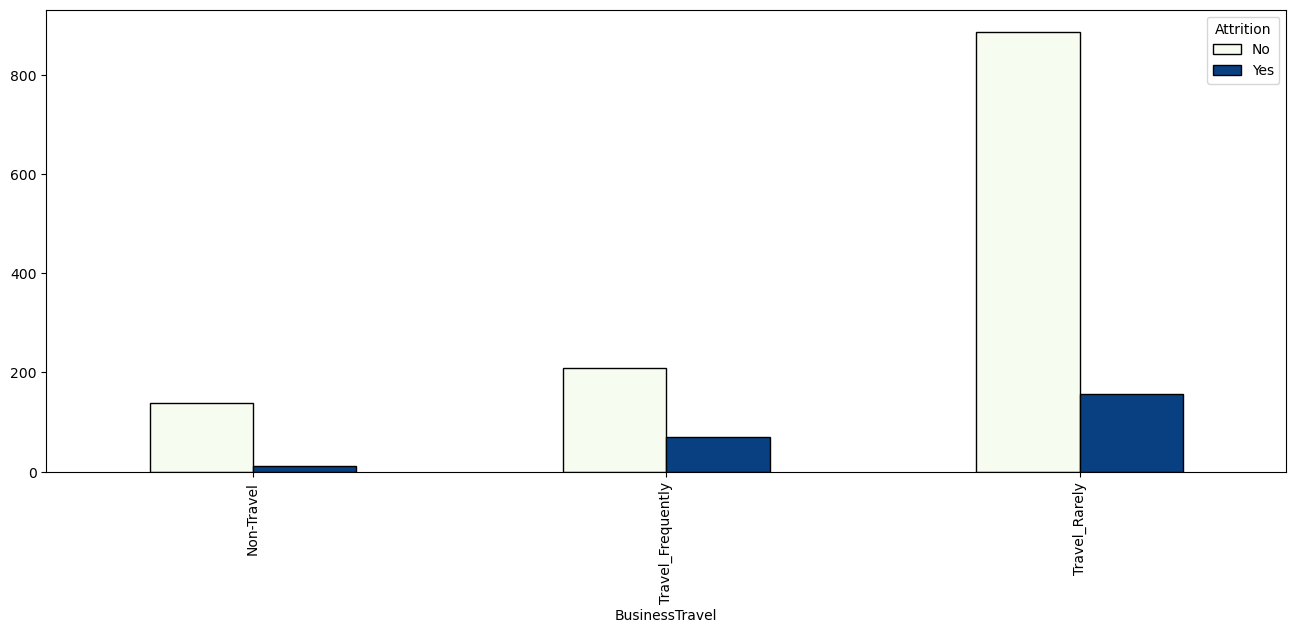

In [16]:
business_travel = df.groupby(['BusinessTravel', 'Attrition']).size()
business_travel = business_travel.unstack().sort_values(by='No', ascending=True)
business_travel.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.show()

`Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.`

In [17]:
mapping_env_satisfaction = {
    1: 'low',
    2: 'medium',
    3: 'high',
    4: 'very high'
}

environment_satisfaction = df['EnvironmentSatisfaction']

df['EnvironmentSatisfaction_category'] = environment_satisfaction.replace(mapping_env_satisfaction)

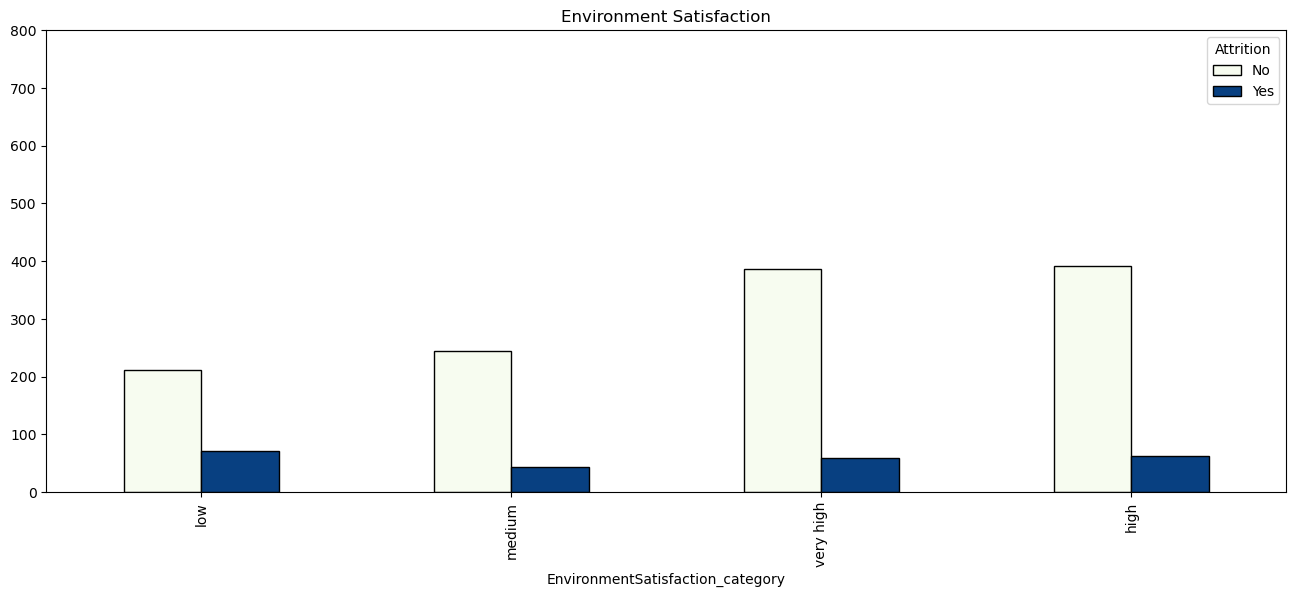

In [18]:
environment_satisfaction = df.groupby(['EnvironmentSatisfaction_category', 'Attrition']).size()
environment_satisfaction = environment_satisfaction.unstack().sort_values(by='No', ascending=True)
environment_satisfaction.plot.bar(edgecolor='black', figsize=(16, 6), ylim=(0, 800), cmap='GnBu')
plt.title('Environment Satisfaction')
plt.show()

`All the employees seems happy with their environment`

In [19]:
df.groupby(['Department', 'Attrition']).size().unstack()

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


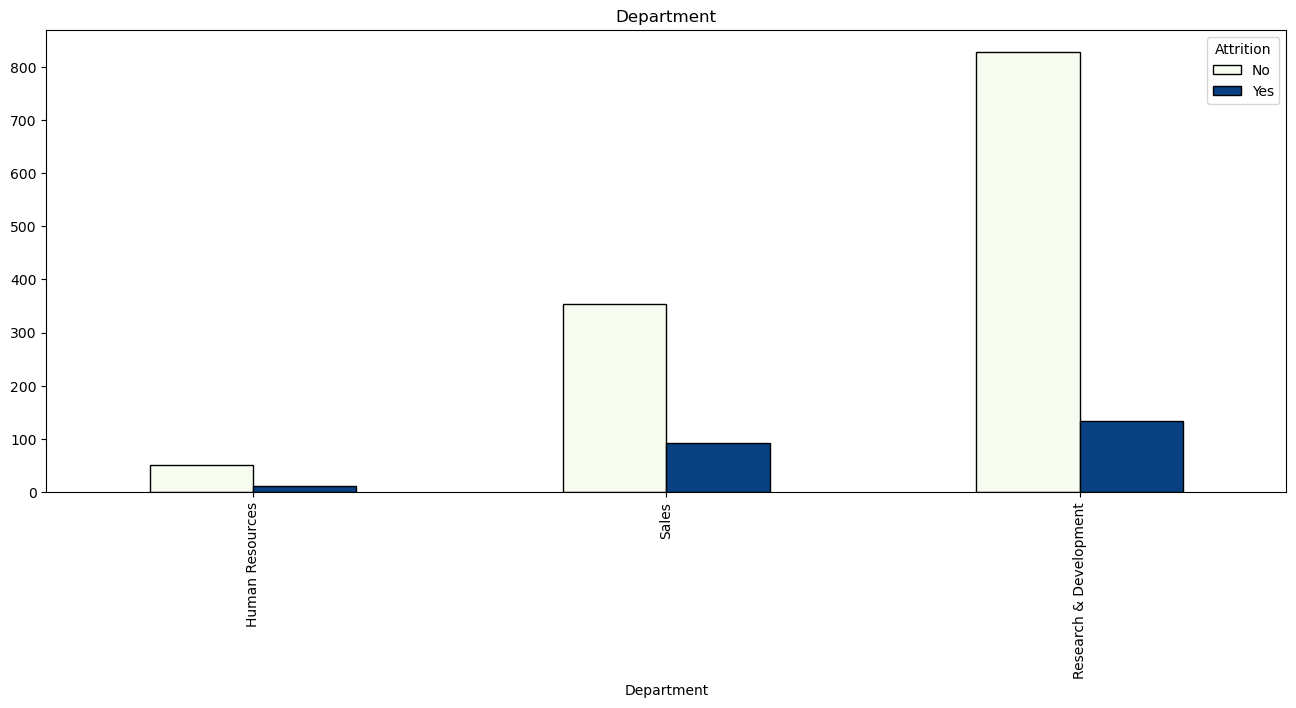

In [20]:
department = df.groupby(['Department', 'Attrition']).size()
department = department.unstack().sort_values(by='No', ascending=True)
department.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.title('Department')
plt.show()

`More employee from Research & Development Department are leaving.`

`But if we differentiate on the percentage then Human Resources Department has most attrition`

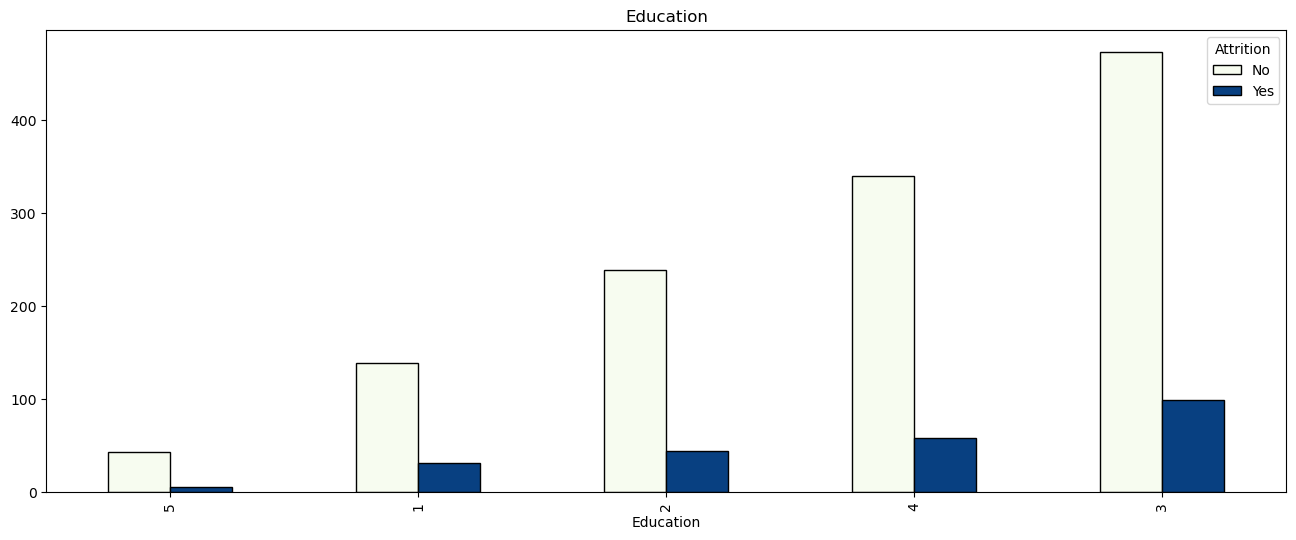

In [21]:
education = df.groupby(['Education', 'Attrition']).size()
education = education.unstack().sort_values(by='No', ascending=True)
education.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.title('Education')
plt.show()

`Education Dosen't effect `

In [22]:
education_field = df.groupby(['EducationField', 'Attrition']).size()
education_field = education_field.unstack()
education_field

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


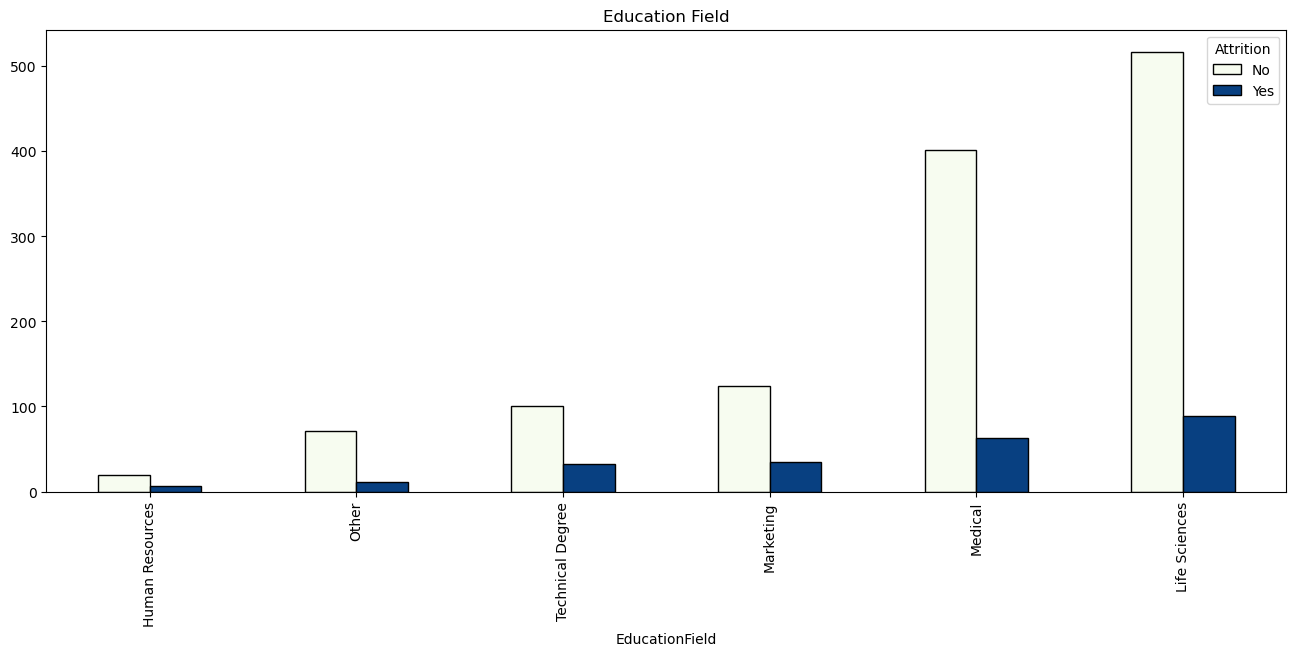

In [23]:
education_field = education_field.sort_values(by='No', ascending=True)
education_field.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.title('Education Field')
plt.show()

`Employees who have Human Resources as there Education Background have 35% chance of leaving the organization`

`and the employee from Medical, Life Sciences or Other have less attrition.`

In [24]:
jobrole = df.groupby(['JobRole', 'Attrition']).size().unstack()
jobrole

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


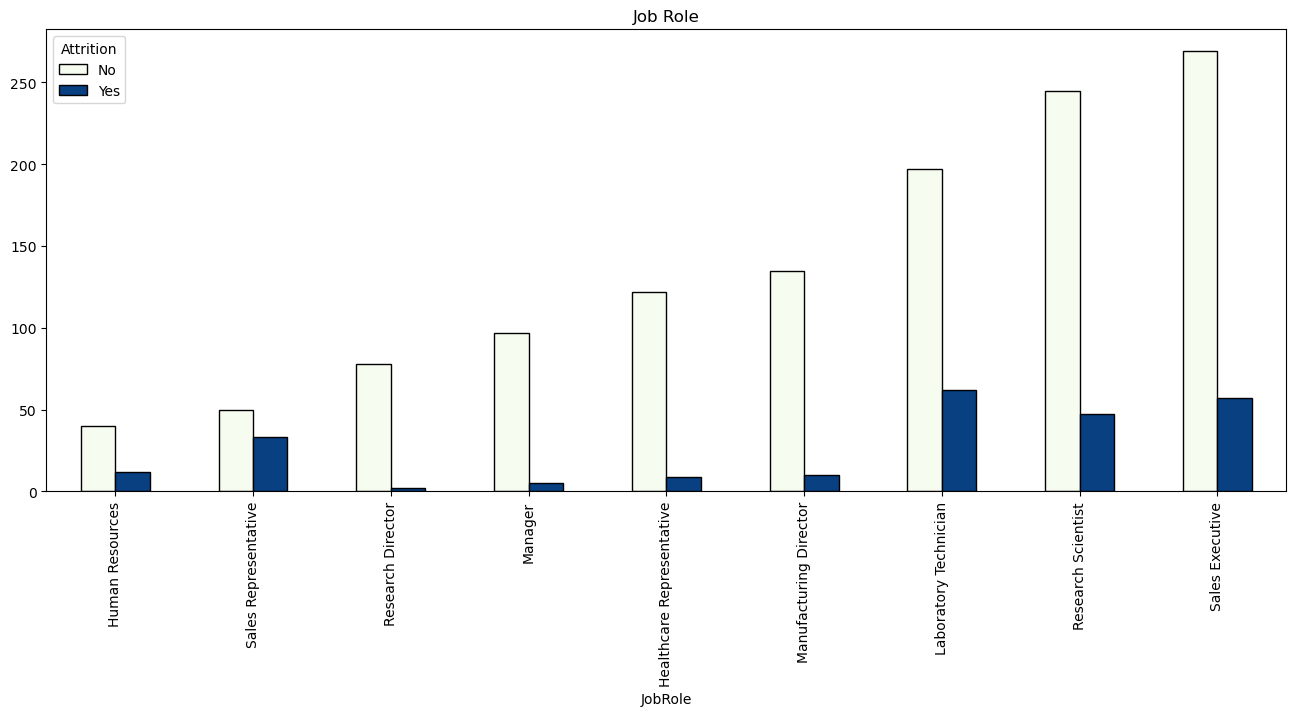

In [25]:
jobrole = jobrole.sort_values(by='No', ascending=True)
jobrole.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.title('Job Role')
plt.show()

`The employee those who work as a Research Director have very less or no attrition.`

`and laboratory Technician have highest attrition.`

`If we consider percentage wise then Sales Representative Job has the highest attrition followed by Human Resources Job.`

In [26]:
overtime = df.groupby(['OverTime', 'Attrition']).size().unstack()
overtime

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


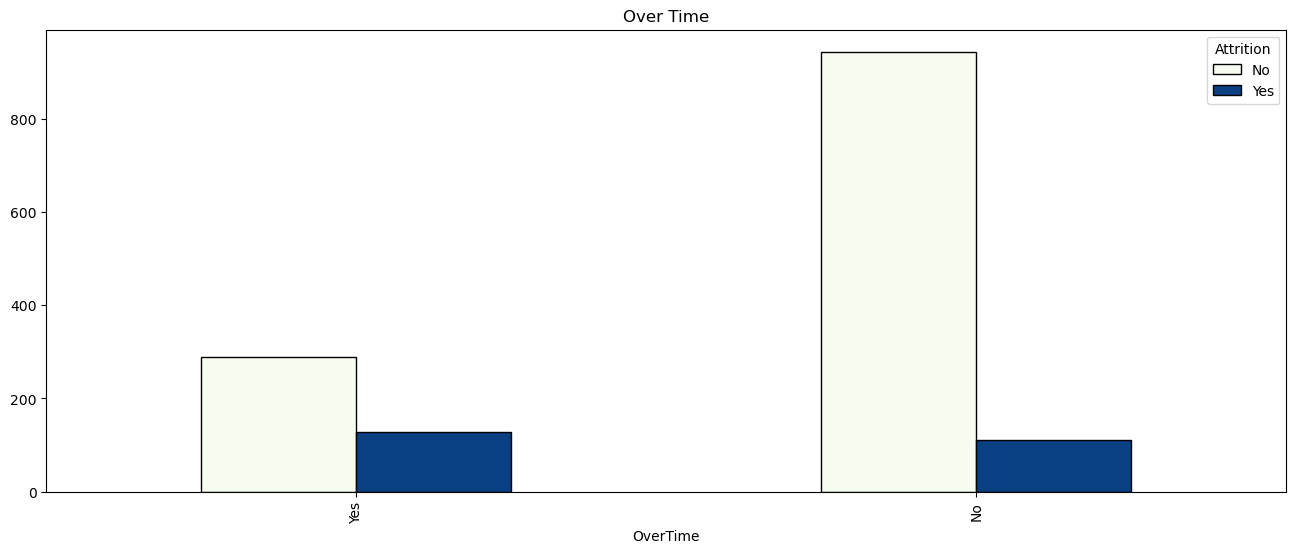

In [27]:
overtime = overtime.sort_values(by='No', ascending=True)
overtime.plot.bar(edgecolor='black', figsize=(16, 6), cmap='GnBu')
plt.title('Over Time')
plt.show()

`There is 44% chance of attrition if the employee works over time.`

`It's better to not ask employee to work over time.`

In [28]:
# for i in df.columns:
#     col = df.groupby([i, 'Attrition']).size()
#     col = col.unstack(fill_value=0).sort_values(by='No', ascending=True)
#     col.plot.bar(edgecolor='black', figsize=(16, 6))
#     plt.title(i)
#     plt.show()

# Model Building

We are using the following algorithms for model building
- [x] Random Forest Regressor
- [x] SVM 
- [x] Logistic Regression
- [x] AdaBoost
- [x] XgBoost

## Columns to drop
- EnvironmentSatisfaction_category:- We added this column for EDA
- Over18: All the employees are over 18 so doesn't matter whether to include it or not.
- StandardHours:- StandardHours doesn't really affect the attrition 
- EmployeeNumber:- It's an unique identifier for a employee 
- EmployeeCount:- EmployeeCount doesn't affect the attrition <br/>

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [7]:
label_encoder = LabelEncoder()

In [8]:
model_df = df.drop(['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1)
Y = label_encoder.fit_transform(df.loc[:, 'Attrition'])

In [9]:
x_categorical = model_df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = model_df.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

### **Train Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3)

In [16]:
def plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax=ax1, cmap='GnBu', fmt='g')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax= ax2, cmap='GnBu', fmt='g')
    ax1.set_title('Training Confusion Matrix')
    ax2.set_title('Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [12]:
def get_accuracy_score(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*25, end='')
    print("Training Accuracy", end='')
    print("="*25)
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(clf_report)
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print("="*25, end='')
    print("Testing Accuracy", end='')
    print("="*25)
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(clf_report)
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print("="*50)
    plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

## Random Forest Regressor

In [62]:
random_clf = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True)
random_clf.fit(X_train, y_train)

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.987443    1.000000   0.98931     0.993721      0.989444
recall       1.000000    0.932927   0.98931     0.966463      0.989310
f1-score     0.993682    0.965300   0.98931     0.979491      0.989158
support    865.000000  164.000000   0.98931  1029.000000   1029.000000
ACCURACY SCORE: 0.9893
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.854460   0.733333   0.85034    0.793897      0.834410
recall       0.989130   0.150685   0.85034    0.569908      0.850340
f1-score     0.916877   0.250000   0.85034    0.583438      0.806487
support    368.000000  73.000000   0.85034  441.000000    441.000000
ACCURACY SCORE: 0.8503


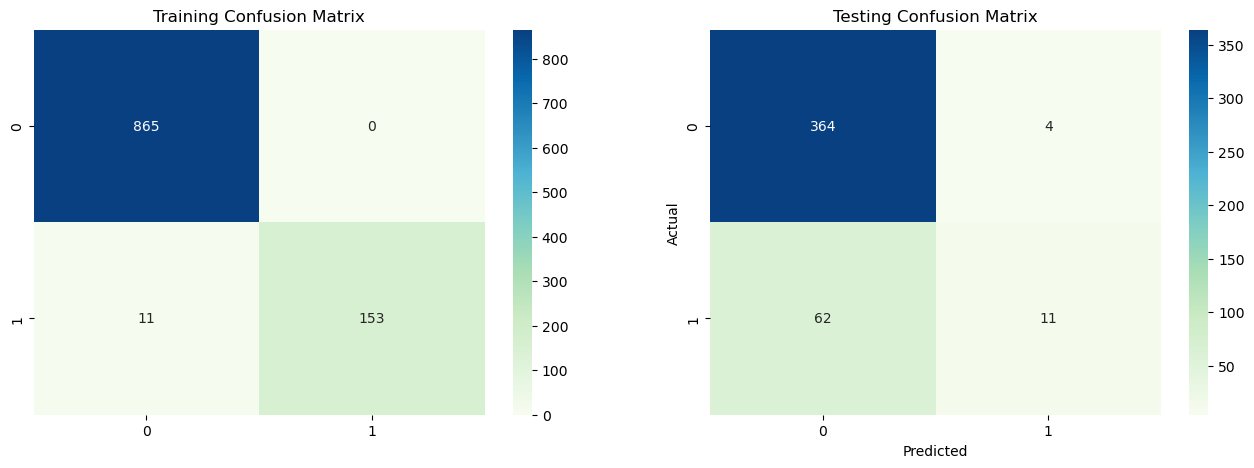

In [63]:
get_accuracy_score(random_clf, X_train, X_test, y_train, y_test)

### Hyperparameter Tuning

In [64]:
n_estimators = [20, 60, 100, 120]
max_features = [0.2, 0.6, 1.0]
max_depth = [2, 8, None] # not imp
max_samples = [0.5, 0.75, 1.0]
bootstrap = [True, False, None]
oob=[True, False, None]

In [65]:
param_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'max_samples' : max_samples, 
              'bootstrap': bootstrap,
              'oob_score': oob
             }

In [66]:
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [67]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20, oob_score=True; total time

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20, oob_score=False; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60, oob_score=True; total time

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total 

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3780 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/ho

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False, None],
                         'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120],
                         'oob_score': [True, False, None]},
             verbose=2)

In [68]:
rf = RandomForestClassifier(**rf_grid.best_params_)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=1.0, max_samples=0.75,
                       n_estimators=20)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.947368    0.991453  0.952381     0.969411      0.954395
recall       0.998844    0.707317  0.952381     0.853081      0.952381
f1-score     0.972425    0.825623  0.952381     0.899024      0.949028
support    865.000000  164.000000  0.952381  1029.000000   1029.000000
ACCURACY SCORE: 0.9524
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.864929   0.842105  0.863946    0.853517      0.861151
recall       0.991848   0.219178  0.863946    0.605513      0.863946
f1-score     0.924051   0.347826  0.863946    0.635938      0.828667
support    368.000000  73.000000  0.863946  441.000000    441.000000
ACCURACY SCORE: 0.8639


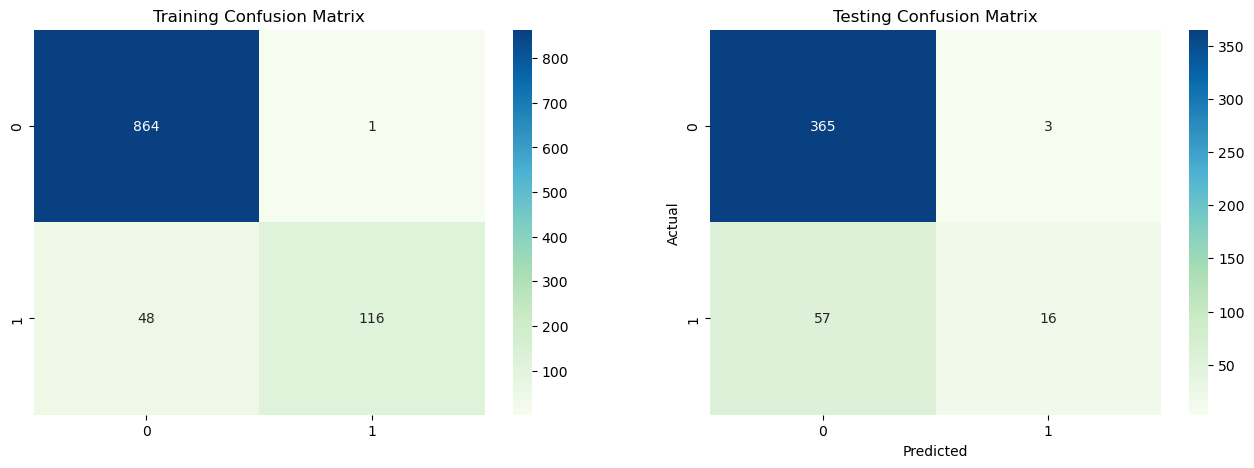

In [69]:
get_accuracy_score(rf, X_train, X_test, y_train, y_test)

## LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression(random_state=0)

In [72]:
lr.fit(X_train, y_train)

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.845098    0.666667  0.843537     0.755882      0.816660
recall       0.996532    0.036585  0.843537     0.516559      0.843537
f1-score     0.914589    0.069364  0.843537     0.491977      0.779879
support    865.000000  164.000000  0.843537  1029.000000   1029.000000
ACCURACY SCORE: 0.8435
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.835991   0.500000  0.834467    0.667995      0.780373
recall       0.997283   0.013699  0.834467    0.505491      0.834467
f1-score     0.909542   0.026667  0.834467    0.468104      0.763397
support    368.000000  73.000000  0.834467  441.000000    441.000000
ACCURACY SCORE: 0.8345


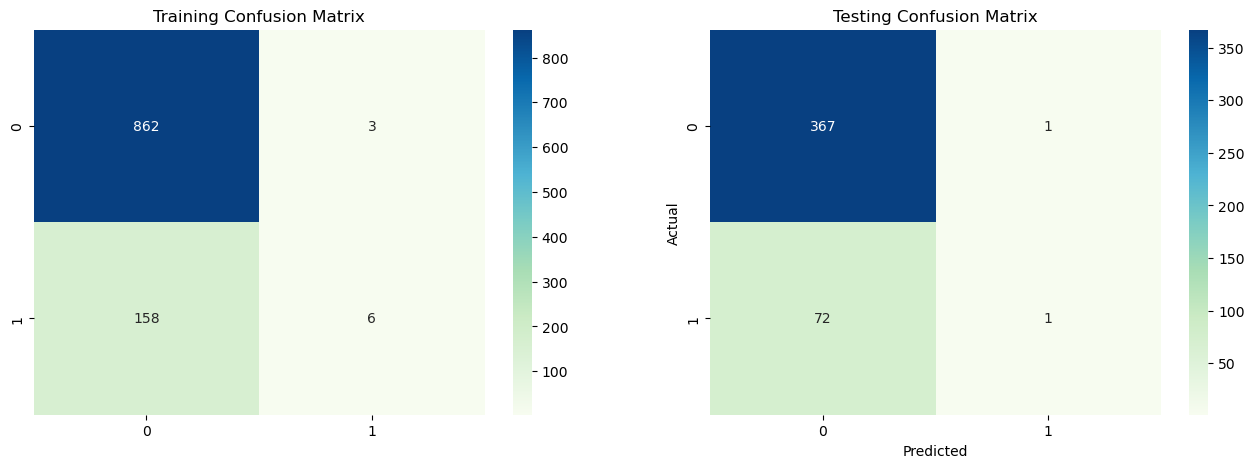

In [73]:
get_accuracy_score(lr, X_train, X_test, y_train, y_test)

### Hyperparameter tuning

In [74]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'fit_intercept': [True, False, None]
}

In [75]:
lr = LogisticRegression()
lr_grid = GridSearchCV(estimator = lr, param_grid=param_grid, cv = 5, n_jobs=-1)

In [76]:
lr_grid.fit(X_train, y_train)

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False, None],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [77]:
lr = LogisticRegression(**lr_grid.best_params_)
lr.fit(X_train, y_train)

/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.845098    0.666667  0.843537     0.755882      0.816660
recall       0.996532    0.036585  0.843537     0.516559      0.843537
f1-score     0.914589    0.069364  0.843537     0.491977      0.779879
support    865.000000  164.000000  0.843537  1029.000000   1029.000000
ACCURACY SCORE: 0.8435
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.835616   0.333333    0.8322    0.584475      0.752472
recall       0.994565   0.013699    0.8322    0.504132      0.832200
f1-score     0.908189   0.026316    0.8322    0.467252      0.762210
support    368.000000  73.000000    0.8322  441.000000    441.000000
ACCURACY SCORE: 0.8322


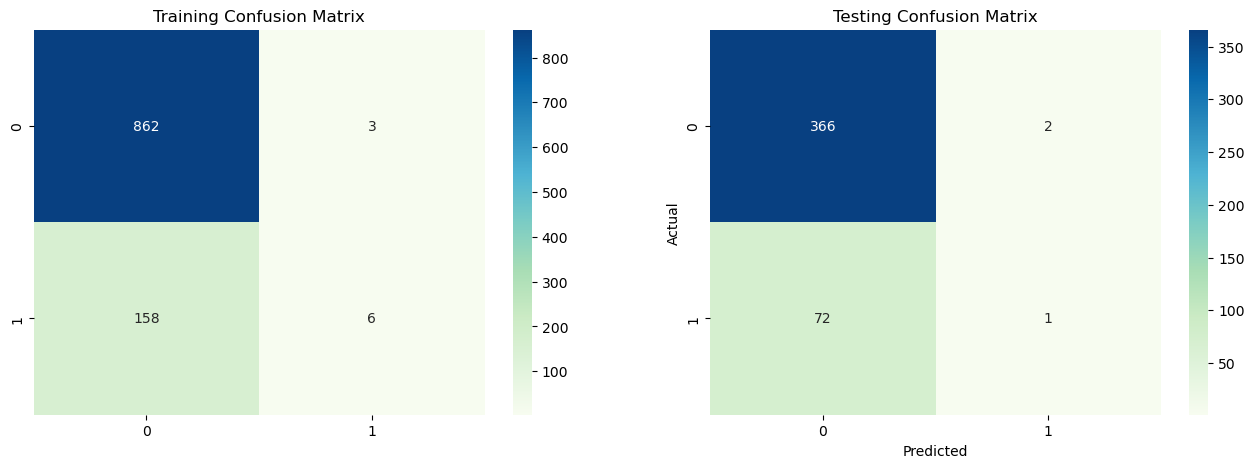

In [78]:
get_accuracy_score(lr, X_train, X_test, y_train, y_test)

## AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
ada_clf = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [81]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.903397    0.839080  0.897959     0.871239      0.893146
recall       0.983815    0.445122  0.897959     0.714468      0.897959
f1-score     0.941893    0.581673  0.897959     0.761783      0.884482
support    865.000000  164.000000  0.897959  1029.000000   1029.000000
ACCURACY SCORE: 0.8980
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.885645   0.866667  0.884354    0.876156      0.882503
recall       0.989130   0.356164  0.884354    0.672647      0.884354
f1-score     0.934531   0.504854  0.884354    0.719693      0.863406
support    368.000000  73.000000  0.884354  441.000000    441.000000
ACCURACY SCORE: 0.8844


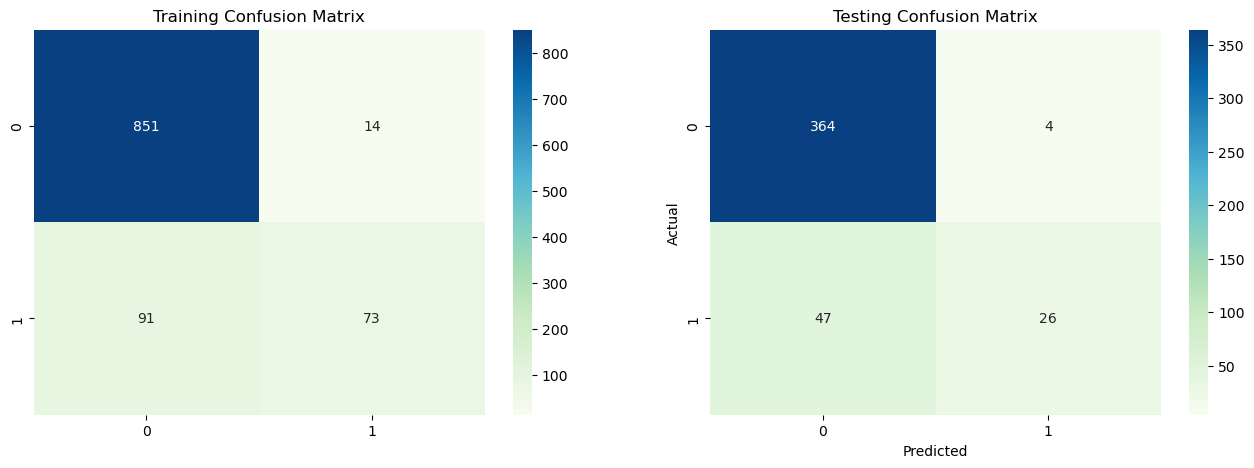

In [82]:
get_accuracy_score(ada_clf, X_train, X_test, y_train, y_test)

### Hyperparameter tuning

In [83]:
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 'n_estimators': [10, 50, 100, 500]}

In [84]:
ada_clf = AdaBoostClassifier()
ada_grid = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, n_jobs=-1)

In [85]:
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]})

In [86]:
ada_clf = AdaBoostClassifier(**ada_grid.best_params_)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

=========================Training Accuracy=========================
                    0           1  accuracy    macro avg  weighted avg
precision    0.895397    0.876712  0.894072     0.886055      0.892419
recall       0.989595    0.390244  0.894072     0.689920      0.894072
f1-score     0.940143    0.540084  0.894072     0.740114      0.876382
support    865.000000  164.000000  0.894072  1029.000000   1029.000000
ACCURACY SCORE: 0.8941
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.876513   0.785714  0.870748    0.831114      0.861483
recall       0.983696   0.301370  0.870748    0.642533      0.870748
f1-score     0.927017   0.435644  0.870748    0.681330      0.845678
support    368.000000  73.000000  0.870748  441.000000    441.000000
ACCURACY SCORE: 0.8707


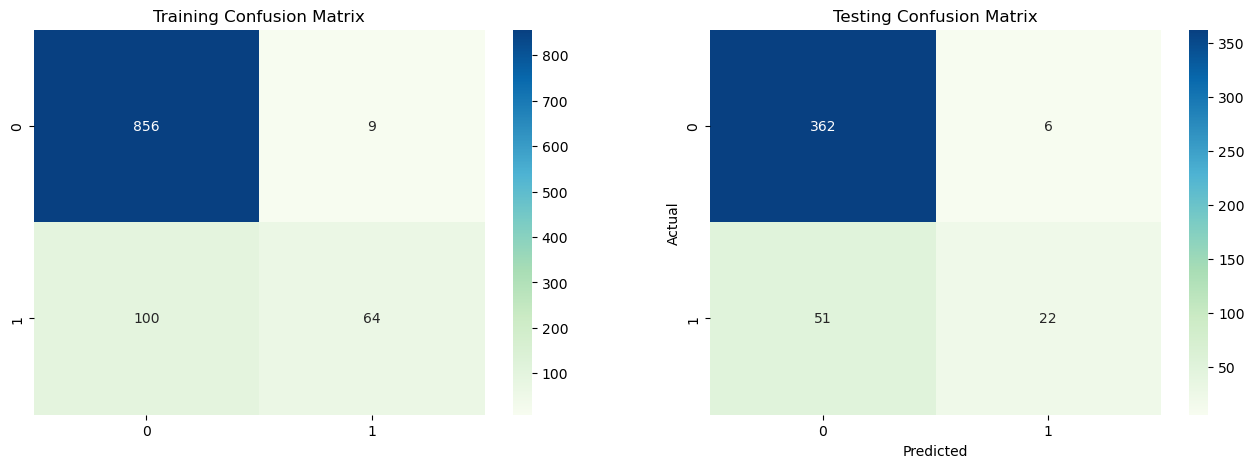

In [87]:
get_accuracy_score(ada_clf, X_train, X_test, y_train, y_test)

## SVM

In [88]:
from sklearn.svm import SVC

In [89]:
svc_clf = SVC(kernel='rbf', random_state=42)

In [90]:
svc_clf.fit(X_train, y_train)

SVC(random_state=42)

=========================Training Accuracy=========================
                    0      1  accuracy    macro avg  weighted avg
precision    0.840622    0.0  0.840622     0.420311      0.706645
recall       1.000000    0.0  0.840622     0.500000      0.840622
f1-score     0.913411    0.0  0.840622     0.456705      0.767833
support    865.000000  164.0  0.840622  1029.000000   1029.000000
ACCURACY SCORE: 0.8406
=========================Testing Accuracy=========================
                    0     1  accuracy   macro avg  weighted avg
precision    0.834467   0.0  0.834467    0.417234      0.696335
recall       1.000000   0.0  0.834467    0.500000      0.834467
f1-score     0.909765   0.0  0.834467    0.454883      0.759169
support    368.000000  73.0  0.834467  441.000000    441.000000
ACCURACY SCORE: 0.8345


/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayush/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayush/anaconda3/lib/pytho

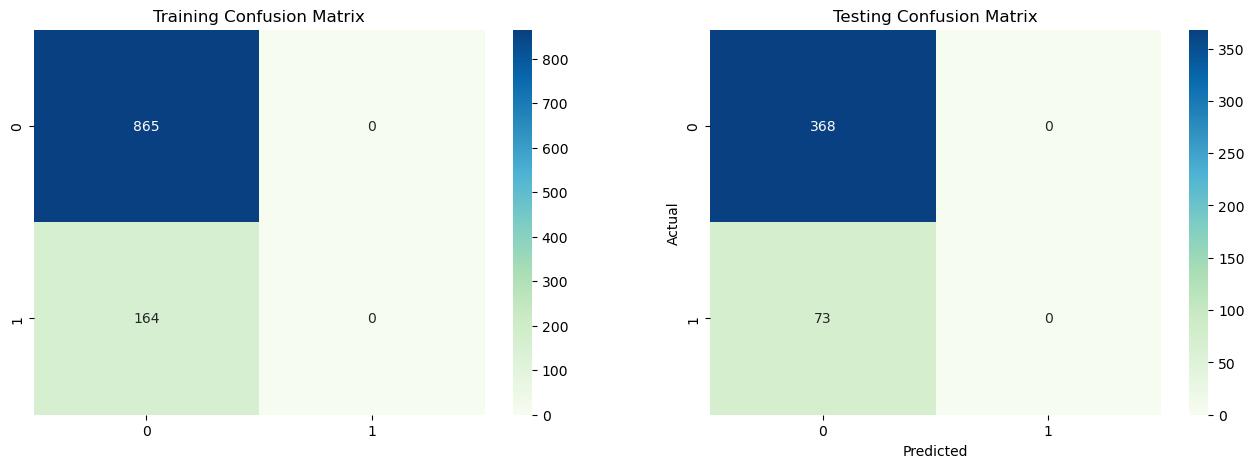

In [91]:
get_accuracy_score(svc_clf, X_train, X_test, y_train, y_test)

## XGBoost

In [17]:
import xgboost as xgb

In [18]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

In [19]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

=========================Training Accuracy=========================
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
ACCURACY SCORE: 1.0000
=========================Testing Accuracy=========================
                    0          1  accuracy   macro avg  weighted avg
precision    0.887781   0.650000  0.866213    0.768890      0.849498
recall       0.962162   0.366197  0.866213    0.664180      0.866213
f1-score     0.923476   0.468468  0.866213    0.695972      0.850221
support    370.000000  71.000000  0.866213  441.000000    441.000000
ACCURACY SCORE: 0.8662


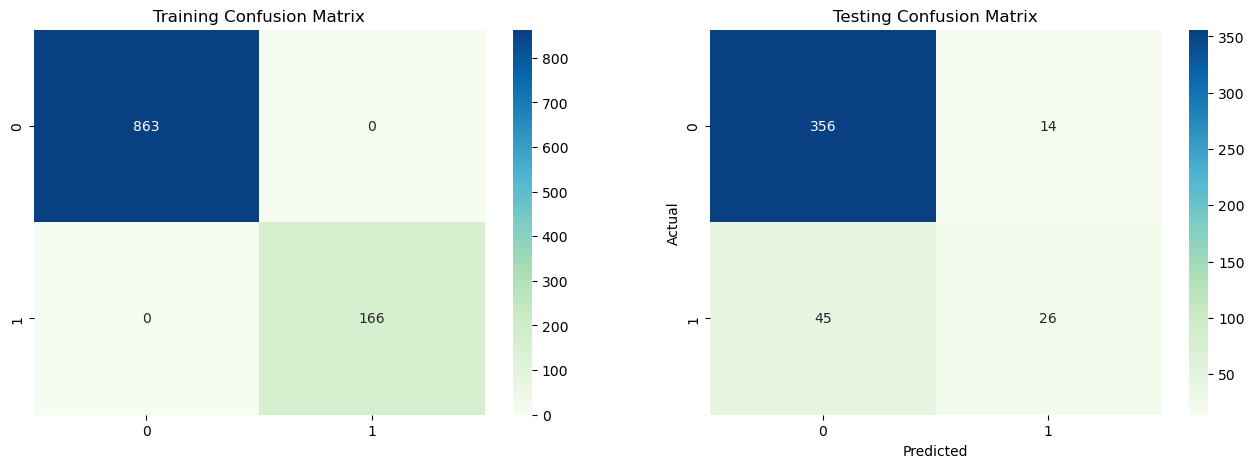

In [20]:
get_accuracy_score(xgb_clf, X_train, X_test, y_train, y_test)

## Comparing Each Algorithm Using ROC

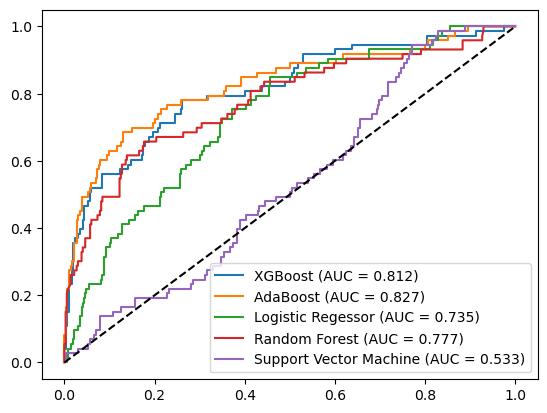

[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=False; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=False; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=0.75, n_estimators=120, oob_score=None; total time=   0.0s
[CV] END bootstrap=None, max_depth=None, max_features=0.2, max_samples=1.0, n_estimators

In [96]:
models = {'XGBoost':xgb_clf, 'AdaBoost':ada_clf, 'Logistic Regessor': lr, 'Random Forest': rf, 'Support Vector Machine': svc_clf}

for k, v in models.items():
    try:
        y_pred_prob = v.predict_proba(X_test)[:, 1]
    except:
        y_pred_prob = v.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{k} (AUC = {auc_score:.3f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.savefig('comparision.png')